C:\Users\karan\AppData\Local\Temp\ipykernel_2140\191515333.py:8: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv")


Shape: (1056660, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non

C:\Users\karan\AppData\Local\Temp\ipykernel_2140\191515333.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['abstract_word_count'] = df_clean['abstract'].astype(str).apply(lambda x: len(x.split()))


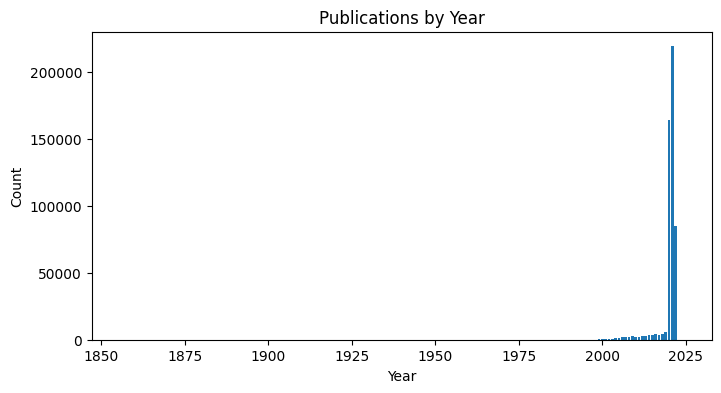

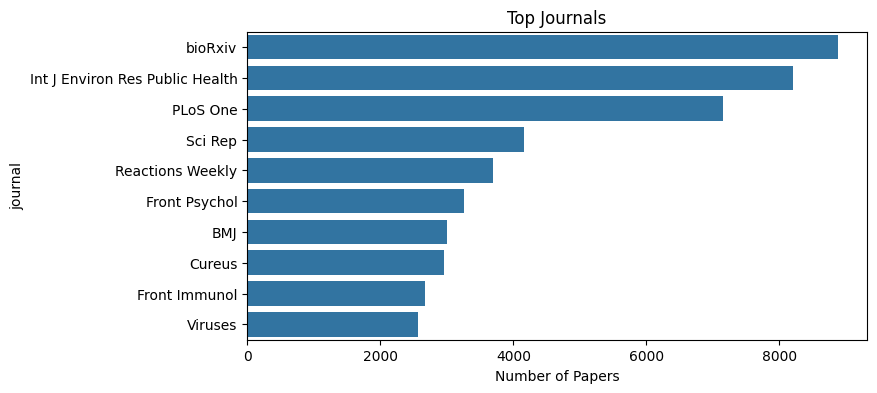

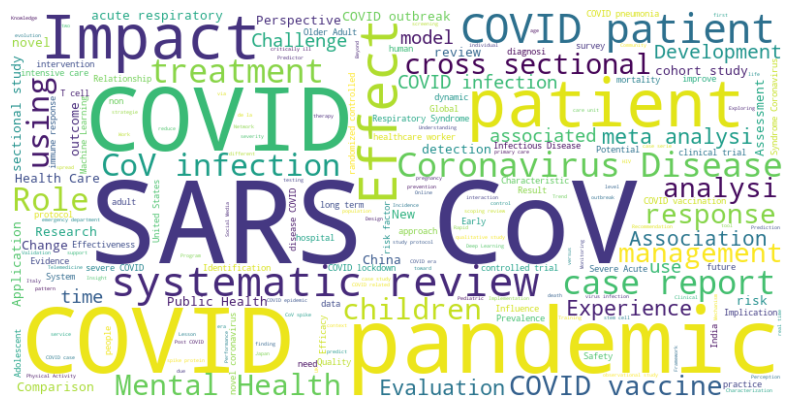

In [3]:
# Frameworks Assignment - Data Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("metadata.csv")

# Explore
print("Shape:", df.shape)
print(df.info())
print(df.head())
print("Missing values:\n", df.isnull().sum().head(10))

# Data Cleaning
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year
df_clean = df.dropna(subset=['title', 'publish_time'])

# Abstract word count
df_clean['abstract_word_count'] = df_clean['abstract'].astype(str).apply(lambda x: len(x.split()))

# Analysis
# 1. Publications per year
year_counts = df_clean['year'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(year_counts.index, year_counts.values)
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 2. Top journals
top_journals = df_clean['journal'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(y=top_journals.index, x=top_journals.values)
plt.title("Top Journals")
plt.xlabel("Number of Papers")
plt.show()

# 3. Word Cloud of Titles
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df_clean['title'].dropna()))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
